In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from joblib import dump
import pickle
from sklearn.svm import SVC

In [2]:
import pandas as pd

# Cargar el archivo CSV
datos = pd.read_csv('llama2_embeddings.csv')

# Mostrar las primeras filas del DataFrame para verificar que se haya cargado correctamente
print(datos.head())

          0         1         2         3         4         5         6  \
0  1.188418 -1.736702 -0.191322 -1.994687  0.057326  2.883176 -0.838245   
1  1.457455  0.817127  1.458703 -1.812698  0.367964  1.609878 -1.075397   
2  0.149753 -1.643355  0.711284 -2.487119 -2.410948 -0.555468 -0.380990   
3  1.069569 -0.899952  1.030322 -1.479048 -0.635635  0.216762  0.876879   
4  0.505189 -1.607398  2.388520 -2.933331 -0.703085  1.615509  0.834435   

          7         8         9  ...      4087      4088      4089      4090  \
0  0.477511  2.910899  3.599902  ... -1.576188 -2.516441  0.888087  0.380534   
1 -1.194629 -0.962105  1.071324  ... -0.815370  0.260745 -0.913560  1.406413   
2 -2.519633  1.750998  1.200407  ... -1.961351  1.976893 -0.154175  1.196034   
3 -0.637044  1.633442  3.777382  ... -1.118121  2.991307  0.879041 -0.939751   
4 -0.337594 -0.439151  1.605850  ... -1.599698 -0.193177  0.144442  0.711942   

       4091      4092      4093      4094      4095      cat_one_hot

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from joblib import dump
import pickle
from sklearn.svm import SVC

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from joblib import dump
import pickle
from sklearn.svm import SVC
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle

def crear_directorio(nombre_carpeta):
    directorio_actual = os.getcwd()
    print("El directorio actual es:", directorio_actual)
    ruta_nueva_carpeta = os.path.join(directorio_actual, nombre_carpeta)
    # Verificar si la carpeta ya existe
    if not os.path.exists(ruta_nueva_carpeta):
        # Crear la carpeta si no existe
        os.mkdir(ruta_nueva_carpeta)
        print("Se creó la carpeta", nombre_carpeta, "en", directorio_actual)
    else:
        print("La carpeta", nombre_carpeta, "ya existe en", directorio_actual)

    ruta_modificada = ruta_nueva_carpeta.replace("\\","/")
    return ruta_modificada

In [4]:
def logistic_regression(dataset,max_iter_1,test_size_1=None, cv=None):
    # Separar las características (X) de las etiquetas (y)
    validacion = ""
    X = dataset.drop('cat_one_hot', axis=1)  # Eliminar la columna 'cat_one_hot' para obtener las características
    y = dataset['cat_one_hot']  # Obtener solo la columna 'cat_one_hot' para obtener las etiquetas

    if test_size_1:
        # Dividir el conjunto de datos en conjunto de entrenamiento y conjunto de prueba
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_1, random_state=42)
        
        # Inicializar el modelo de regresión logística para clasificación multiclase
        modelo_regresion_logistica = LogisticRegression(multi_class='auto', max_iter=max_iter_1)
        
        # Entrenar el modelo de regresión logística
        modelo_regresion_logistica.fit(X_train, y_train)
        
        # Hacer predicciones con el modelo entrenado
        predicciones = modelo_regresion_logistica.predict(X_test)
        
        # Evaluar el rendimiento del modelo
        exactitud = accuracy_score(y_test, predicciones)
        precision = precision_score(y_test, predicciones, average='weighted')
        recall = recall_score(y_test, predicciones, average='weighted')
        f1 = f1_score(y_test, predicciones, average='weighted')
        matriz_confusion = confusion_matrix(y_test, predicciones)
        
        # Crear un mapa de calor para la matriz de confusión
        plt.figure(figsize=(8, 6))
        sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues")
        plt.title('Matriz de Confusión con test = ' + str(test_size_1))
        plt.xlabel('Etiquetas Predichas')
        plt.ylabel('Etiquetas Verdaderas')
    
        # Guardar la figura de la matriz de confusión
        direccion_nueva_carpeta = "logistica_regression_llama2_embedding_val_sim_"
        ruta_figura_incom = crear_directorio(direccion_nueva_carpeta)
        ruta_figura = ruta_figura_incom + "/matriz_confusion_test_" + str(test_size_1) +  ".png"
        plt.savefig(ruta_figura)
        print("Matriz de confusión guardada en:", ruta_figura)
        plt.show()
        
        print("Exactitud del modelo:", exactitud)
        print("Precisión del modelo:", precision)
        print("Recall del modelo:", recall)
        print("Puntuación F1 del modelo:", f1)
    
        resultados = {}
        resultados["exactitud"] = exactitud
        resultados["precision"] = precision
        resultados["recall"] = recall
        resultados["f1"] = f1
        #resultados["matriz_confusion"] = matriz_confusion
        validacion = "simple"
        ruta_para_modelo = ruta_figura_incom + "/regresion_logistica_llama2_embedding_val_test" + str(test_size_1) + ".pkl"
        with open(ruta_para_modelo, 'wb') as archivo:
            pickle.dump(modelo_regresion_logistica, archivo)

    elif cv:
        # Inicializar el modelo de regresión logística para clasificación multiclase
        modelo_regresion_logistica = LogisticRegression(multi_class='auto', max_iter=max_iter_1)
        
        # Realizar validación cruzada
        predicciones = cross_val_predict(modelo_regresion_logistica, X, y, cv=cv)
        # Evaluar el rendimiento del modelo
        exactitud = accuracy_score(y, predicciones)
        precision = precision_score(y, predicciones, average='weighted')
        recall = recall_score(y, predicciones, average='weighted')
        f1 = f1_score(y, predicciones, average='weighted')
        matriz_confusion = confusion_matrix(y, predicciones)
         
        # Crear un mapa de calor para la matriz de confusión
        plt.figure(figsize=(8, 6))
        sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues")
        plt.title('Matriz de Confusión con Validación Cruzada (cv = ' + str(cv) + ')')
        plt.xlabel('Etiquetas Predichas')
        plt.ylabel('Etiquetas Verdaderas')

        # Guardar la figura de la matriz de confusión
        direccion_nueva_carpeta = "logistica_regression_llama3_embedding_val_cruz"
        ruta_figura_incom = crear_directorio(direccion_nueva_carpeta)
        ruta_figura = ruta_figura_incom + "/matriz_confusion_cv_" + str(cv) + ".png"
        plt.savefig(ruta_figura)
        print("Matriz de confusión guardada en:", ruta_figura)
        plt.show()
        
        print("Exactitud media:", exactitud)
        print("Precisión media:", precision)
        print("Recall media:", recall)
        print("Puntuación F1 media:", f1)

        resultados = {}
        resultados["exactitud_media"] = exactitud
        resultados["precision_media"] = precision
        resultados["recall_media"] = recall
        resultados["f1_media"] = f1
        validacion = "cruz"
        ruta_para_modelo = ruta_figura_incom + "/regresion_logistica_llama2_embedding_val_cruz" + str(cv) + ".pkl"
        with open(ruta_para_modelo, 'wb') as archivo:
            pickle.dump(modelo_regresion_logistica, archivo)
    else:
        print("Por favor, proporciona el tamaño de prueba (test_size_1) o el número de pliegues de validación cruzada (cv).")
        resultados = None
    
    return resultados,validacion,ruta_figura_incom

El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Se creó la carpeta logistica_regression_llama2_embedding_val_sim_ en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/logistica_regression_llama2_embedding_val_sim_/matriz_confusion_test_0.1.png


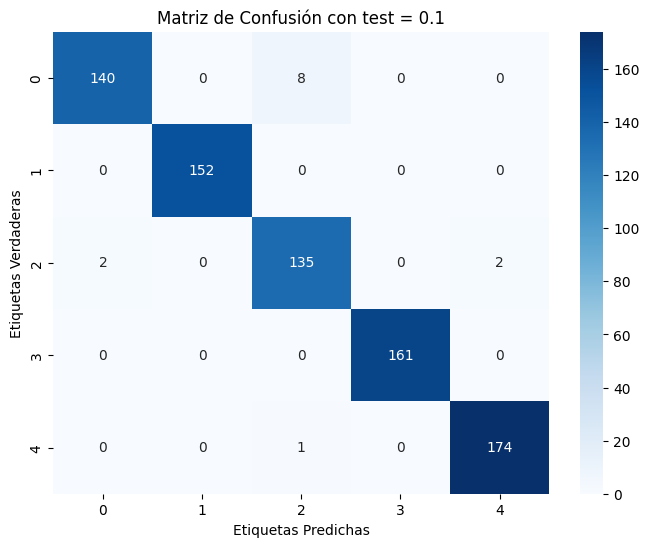

Exactitud del modelo: 0.983225806451613
Precisión del modelo: 0.9835346536698194
Recall del modelo: 0.983225806451613
Puntuación F1 del modelo: 0.9832460209262072
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta logistica_regression_llama2_embedding_val_sim_ ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/logistica_regression_llama2_embedding_val_sim_/matriz_confusion_test_0.2.png


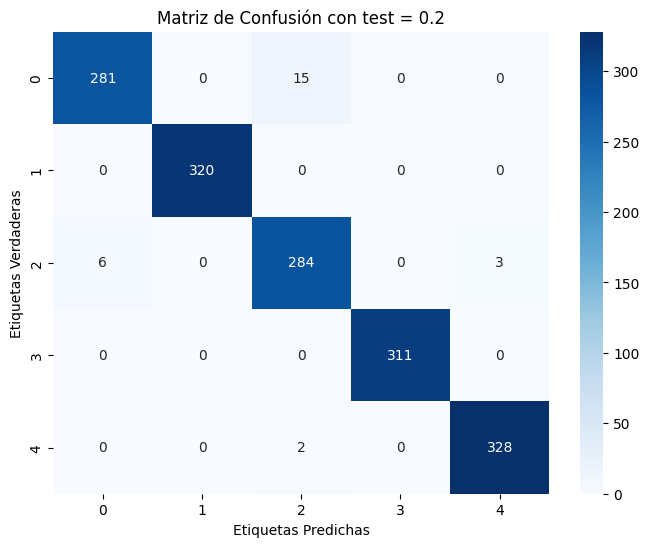

Exactitud del modelo: 0.983225806451613
Precisión del modelo: 0.9834017660493736
Recall del modelo: 0.983225806451613
Puntuación F1 del modelo: 0.9832366281928951
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta logistica_regression_llama2_embedding_val_sim_ ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/logistica_regression_llama2_embedding_val_sim_/matriz_confusion_test_0.3.png


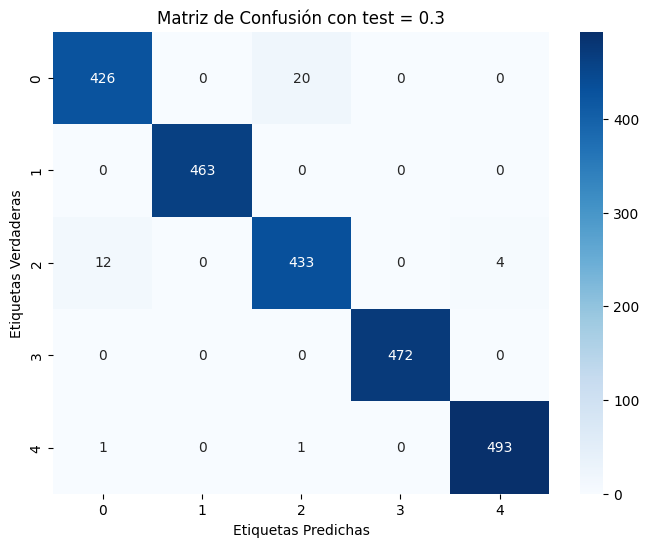

Exactitud del modelo: 0.9836559139784946
Precisión del modelo: 0.9836731547607169
Recall del modelo: 0.9836559139784946
Puntuación F1 del modelo: 0.9836464413917794
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta logistica_regression_llama2_embedding_val_sim_ ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/logistica_regression_llama2_embedding_val_sim_/matriz_confusion_test_0.4.png


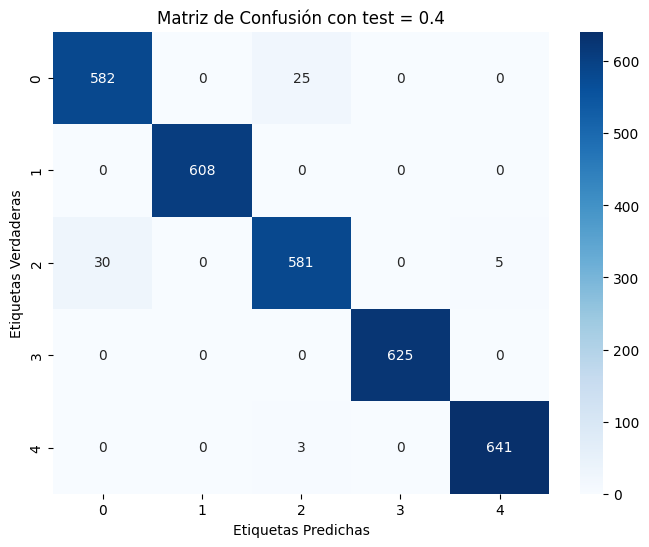

Exactitud del modelo: 0.9796774193548388
Precisión del modelo: 0.9796576576886828
Recall del modelo: 0.9796774193548388
Puntuación F1 del modelo: 0.9796577415888017
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta logistica_regression_llama2_embedding_val_sim_ ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/logistica_regression_llama2_embedding_val_sim_/matriz_confusion_test_0.5.png


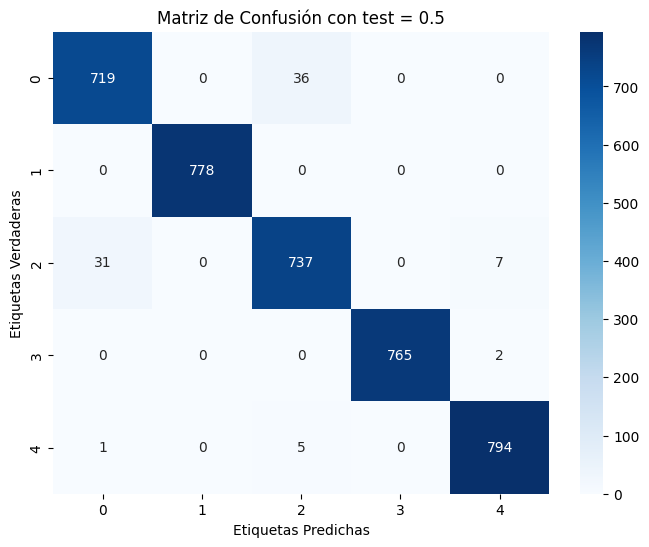

Exactitud del modelo: 0.9788387096774194
Precisión del modelo: 0.9788442018535735
Recall del modelo: 0.9788387096774194
Puntuación F1 del modelo: 0.9788383817244192
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta logistica_regression_llama2_embedding_val_sim_ ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/logistica_regression_llama2_embedding_val_sim_/matriz_confusion_test_0.6.png


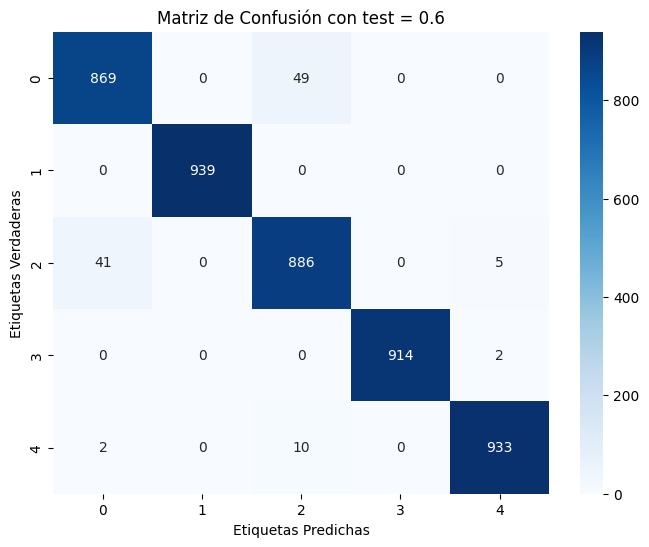

Exactitud del modelo: 0.9765591397849462
Precisión del modelo: 0.9766648411682247
Recall del modelo: 0.9765591397849462
Puntuación F1 del modelo: 0.9765992474494076
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta logistica_regression_llama2_embedding_val_sim_ ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/logistica_regression_llama2_embedding_val_sim_/matriz_confusion_test_0.7.png


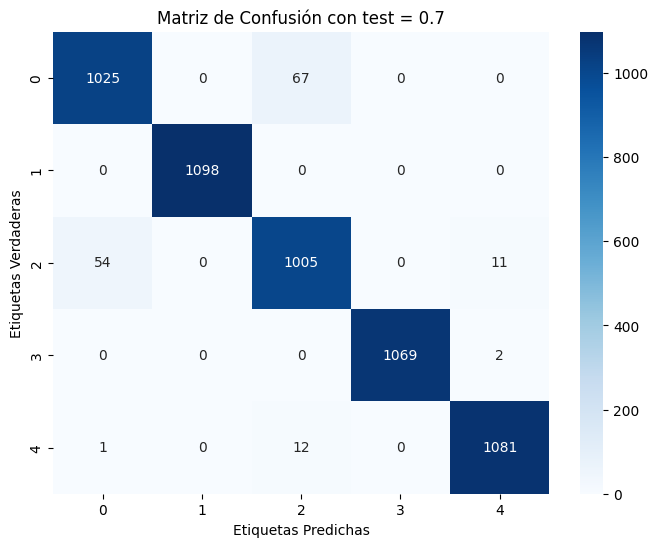

Exactitud del modelo: 0.9729032258064516
Precisión del modelo: 0.9729786514455007
Recall del modelo: 0.9729032258064516
Puntuación F1 del modelo: 0.97292719178245
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta logistica_regression_llama2_embedding_val_sim_ ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/logistica_regression_llama2_embedding_val_sim_/matriz_confusion_test_0.8.png


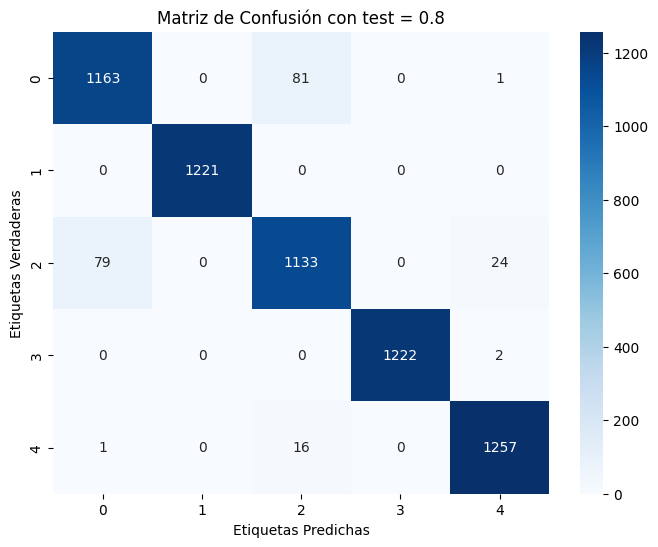

Exactitud del modelo: 0.9670967741935483
Precisión del modelo: 0.9670336110976515
Recall del modelo: 0.9670967741935483
Puntuación F1 del modelo: 0.9670607686269436
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta logistica_regression_llama2_embedding_val_sim_ ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/logistica_regression_llama2_embedding_val_sim_/matriz_confusion_test_0.9.png


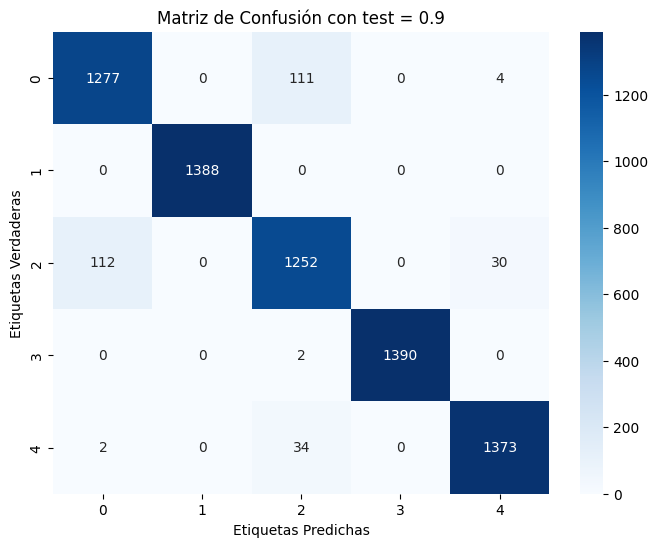

Exactitud del modelo: 0.9577060931899641
Precisión del modelo: 0.9577627369262545
Recall del modelo: 0.9577060931899641
Puntuación F1 del modelo: 0.9577336147536508
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/logistica_regression_llama2_embedding_val_sim_/regresion_logistica_llama2_embedding_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Se creó la carpeta logistica_regression_llama3_embedding_val_cruz en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/logistica_regression_llama3_embedding_val_cruz/matriz_confusion_cv_2.png


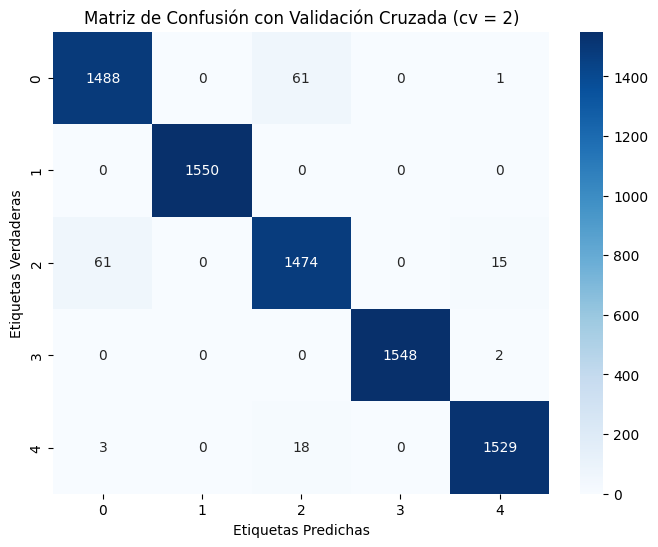

Exactitud media: 0.979225806451613
Precisión media: 0.9792516355886924
Recall media: 0.979225806451613
Puntuación F1 media: 0.9792381950476887
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta logistica_regression_llama3_embedding_val_cruz ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/logistica_regression_llama3_embedding_val_cruz/matriz_confusion_cv_3.png


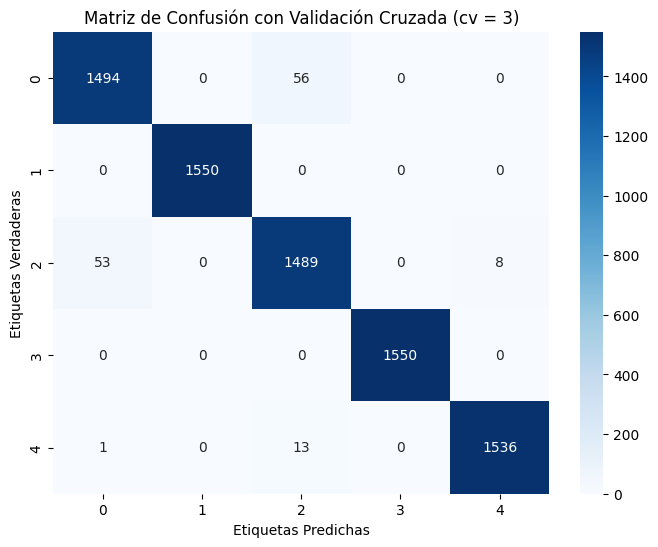

Exactitud media: 0.9830967741935484
Precisión media: 0.9831294767561739
Recall media: 0.9830967741935484
Puntuación F1 media: 0.983111028616668
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta logistica_regression_llama3_embedding_val_cruz ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/logistica_regression_llama3_embedding_val_cruz/matriz_confusion_cv_4.png


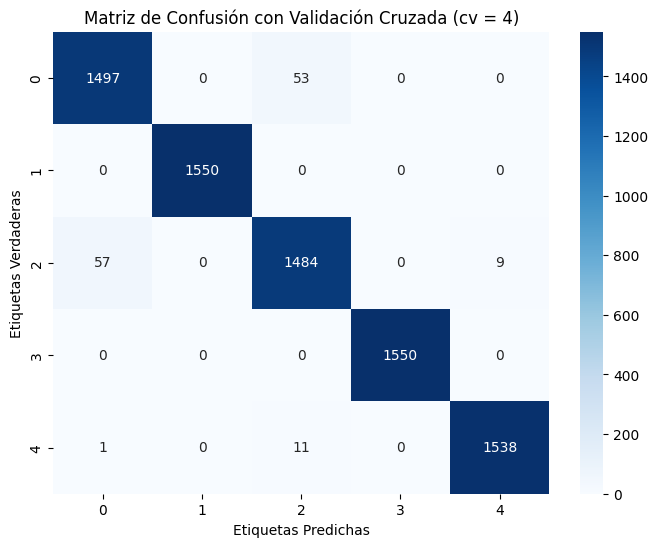

Exactitud media: 0.9830967741935484
Precisión media: 0.9831079167359029
Recall media: 0.9830967741935484
Puntuación F1 media: 0.9831015791343011
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta logistica_regression_llama3_embedding_val_cruz ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/logistica_regression_llama3_embedding_val_cruz/matriz_confusion_cv_5.png


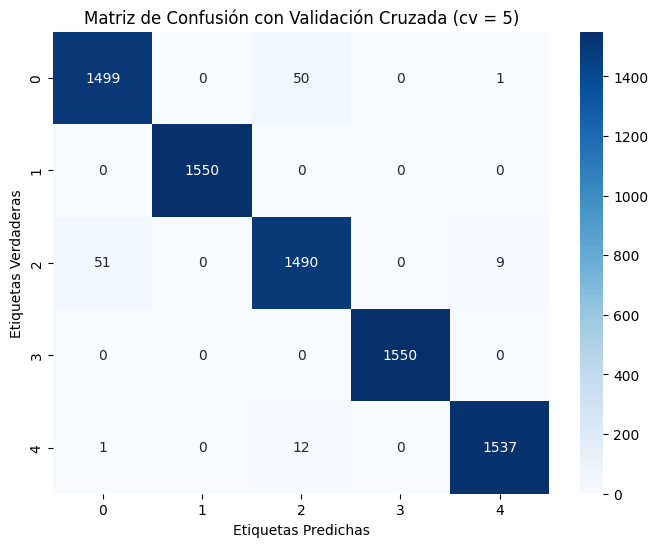

Exactitud media: 0.984
Precisión media: 0.9840121330699114
Recall media: 0.984
Puntuación F1 media: 0.9840057802836247
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta logistica_regression_llama3_embedding_val_cruz ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/logistica_regression_llama3_embedding_val_cruz/matriz_confusion_cv_6.png


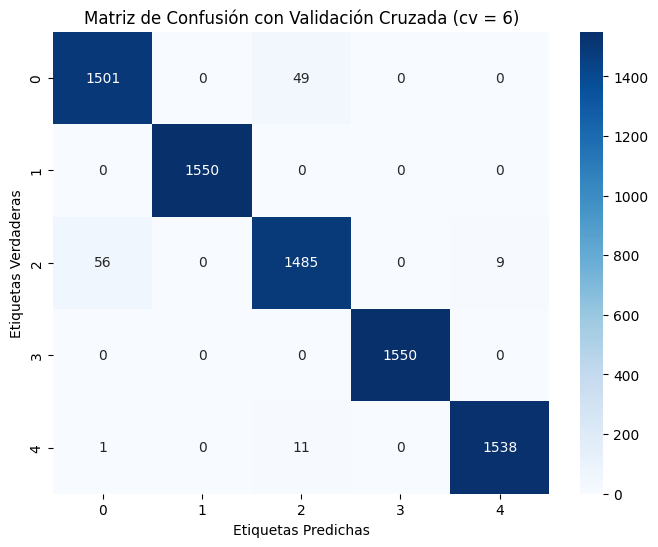

Exactitud media: 0.983741935483871
Precisión media: 0.9837523941979931
Recall media: 0.983741935483871
Puntuación F1 media: 0.9837451976384176
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta logistica_regression_llama3_embedding_val_cruz ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/logistica_regression_llama3_embedding_val_cruz/matriz_confusion_cv_7.png


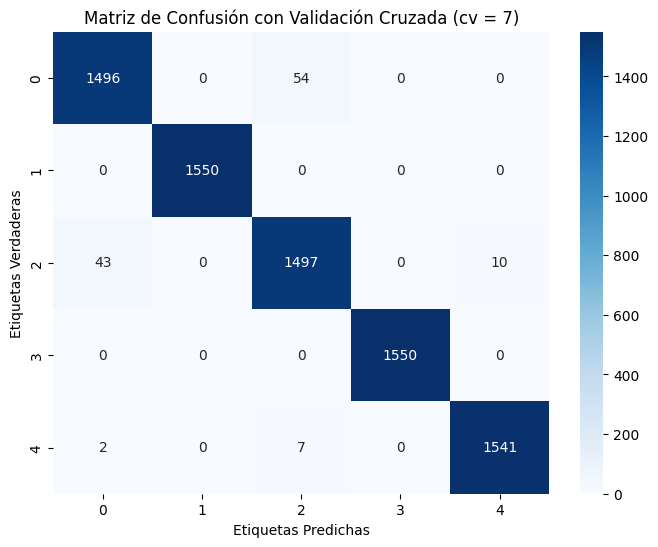

Exactitud media: 0.9850322580645161
Precisión media: 0.9850395939586873
Recall media: 0.9850322580645161
Puntuación F1 media: 0.9850329875562237
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta logistica_regression_llama3_embedding_val_cruz ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/logistica_regression_llama3_embedding_val_cruz/matriz_confusion_cv_8.png


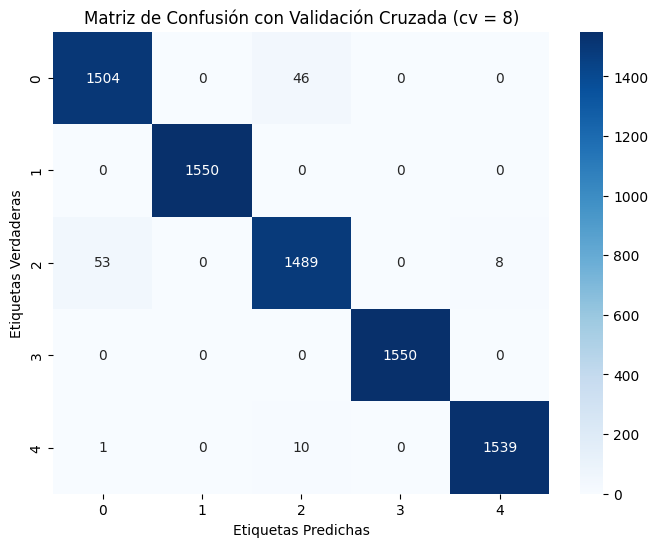

Exactitud media: 0.9847741935483871
Precisión media: 0.9847845851472168
Recall media: 0.9847741935483871
Puntuación F1 media: 0.9847774181167641
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta logistica_regression_llama3_embedding_val_cruz ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/logistica_regression_llama3_embedding_val_cruz/matriz_confusion_cv_9.png


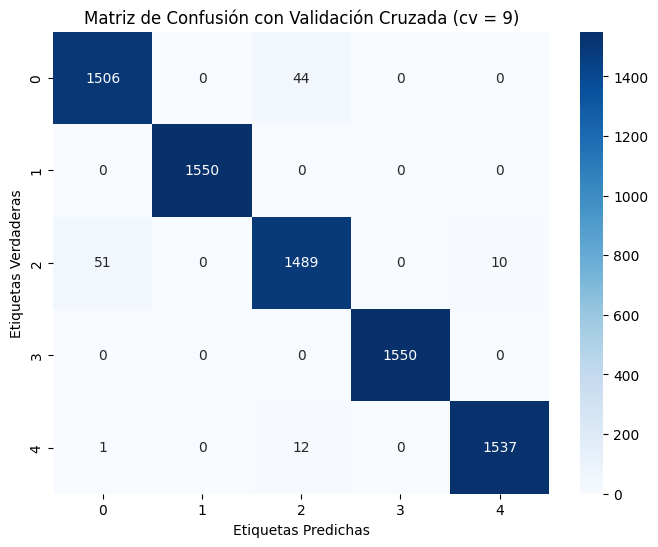

Exactitud media: 0.9847741935483871
Precisión media: 0.9847827595922688
Recall media: 0.9847741935483871
Puntuación F1 media: 0.9847765038762631
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta logistica_regression_llama3_embedding_val_cruz ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/logistica_regression_llama3_embedding_val_cruz/matriz_confusion_cv_10.png


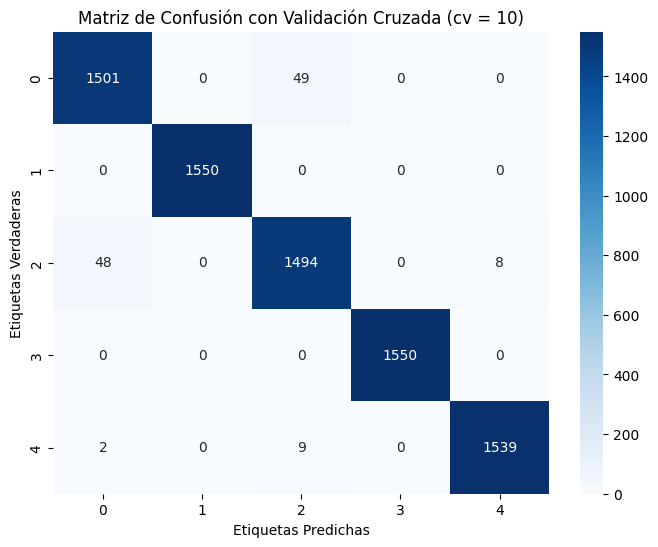

Exactitud media: 0.9850322580645161
Precisión media: 0.9850440600821231
Recall media: 0.9850322580645161
Puntuación F1 media: 0.9850378723383592
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/logistica_regression_llama3_embedding_val_cruz/regresion_logistica_llama2_embedding_val_cruz.json


In [5]:
import json
from sklearn.model_selection import cross_val_predict

def almacenar_informacion(resultados_finales,validacion,ruta_figura_incom):
    if validacion == "simple":
        ruta_archivo = ruta_figura_incom + "/regresion_logistica_llama2_embedding_val_simple.json"
        with open(ruta_archivo, "w") as archivo:
            json.dump(resultados_finales, archivo)
        
        print("Diccionario guardado como archivo JSON en:", ruta_archivo)
    elif validacion == "cruz":
        ruta_archivo =  ruta_figura_incom + "/regresion_logistica_llama2_embedding_val_cruz.json"
        with open(ruta_archivo, "w") as archivo:
            json.dump(resultados_finales, archivo)
        
        print("Diccionario guardado como archivo JSON en:", ruta_archivo)

# Inicializar una lista vacía para almacenar los valores
lista_valores = []
ruta_figura_incom = ""
# Bucle for para generar los valores en incrementos de 0.10 hasta 0.9
for i in range(1, 10):
    valor = i / 10.0
    lista_valores.append(valor)

resultados_finales_val_simple = {}
resultados_finales_val_cruz = {}

experimento = 1
test_size_1 = 0
h = 1000
for i in lista_valores:
    resultados_finales_val_simple["Experimento_LR_" + str(experimento) + "_test_" + str(i)],validacion,ruta_figura_incom = logistic_regression(datos,h,test_size_1=i)
    experimento = experimento + 1

almacenar_informacion(resultados_finales_val_simple,validacion,ruta_figura_incom)

lista = list(range(2, 11))
for j in lista:
    resultados_finales_val_cruz["Experimento_LR_" + str(experimento) + "_test_" + str(j)],validacion,ruta_figura_incom = logistic_regression(datos,h,cv=j)

almacenar_informacion(resultados_finales_val_cruz,validacion,ruta_figura_incom)